# Explore flight delay data

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('white')

In [2]:
from matplotlib import cm
def getcmaprgb(N, cmap):
    """Get the RGB values of N colors across the jet spectrum"""
    return cmap(np.linspace(0,255,N).astype(int))

# Load data

In [3]:
airlines_path = '/gh/data/flightdelay/airlines.csv'
airports_path = '/gh/data/flightdelay/airports.csv'
flights_path = '/gh/data/flightdelay/flights.csv'

In [4]:
df_al = pd.DataFrame.from_csv(airlines_path)
df_ap = pd.DataFrame.from_csv(airports_path)
df_fl = pd.io.parsers.read_csv(flights_path)#, nrows = N_flights)

/Users/scott/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_SAN = df_fl[df_fl['ORIGIN_AIRPORT']=='SAN']

In [6]:
df_al.head()

,AIRLINE
IATA_CODE,
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways


In [7]:
df_ap.loc['LAX']

AIRPORT      Los Angeles International Airport
CITY                               Los Angeles
STATE                                       CA
COUNTRY                                    USA
LATITUDE                               33.9425
LONGITUDE                             -118.408
Name: LAX, dtype: object

In [8]:
df_fl.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_SAN.tail(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5818405,2015,12,31,4,AS,497,N483AS,SAN,SEA,2030,...,2303.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818445,2015,12,31,4,NK,1104,N505NK,SAN,DEN,2038,...,2357.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818544,2015,12,31,4,AS,717,N585AS,SAN,SLC,2055,...,2336.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818569,2015,12,31,4,B6,90,N579JB,SAN,JFK,2100,...,428.0,-33.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818812,2015,12,31,4,B6,20,N608JB,SAN,BOS,2200,...,533.0,-36.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818816,2015,12,31,4,UA,1916,N69829,SAN,EWR,2202,...,537.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818843,2015,12,31,4,AA,1042,N870AA,SAN,MIA,2210,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818883,2015,12,31,4,DL,1792,N1402A,SAN,ATL,2230,...,511.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818899,2015,12,31,4,UA,240,N30401,SAN,ORD,2235,...,405.0,-38.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5818918,2015,12,31,4,DL,1366,N341NW,SAN,DTW,2245,...,530.0,-34.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_fl.keys()

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

# Explore relationships between features and delay times

Delay time related to (categorical):
1. Month (categories)
2. Day of week (categories)
3. Airline (categories)
4. Flight number (for 1 airline)
5. Tail number (for 1 airline)
6. Origin airport (for 1 airline)
7. Destination airport (for 1 airline)
8. scheduled departure hour
9. scheduled arrival hour

Delay time related to (continuous):
1. scheduled duration
2. distance

Delay time could be
* **Start with DEPARTURE_DELAY**
* Calculate extra in-plane delay (ARRIVAL_DELAY - DEPARTURE_DELAY)
    * From this we could see which airlines speed up the most to make up for lost time
    * Maybe should account for delay by TAXI_OUT time
* Arrival_delay could be an extension in TAXI_IN, TAI_OUT, or AIR_TIME?
    * Reference based on the average TAXI_IN and TAXI_OUT time

### 1. Month vs. delay
* Fix: ORIGIN_AIRPORT == 'SAN'
* For each month, find distribution of delay times

**1a. Curate delays for each month**

In [11]:
# Make DF for SAN flights
# NOTE: SAN is 14679 in October, see:
# dfDL = df_fl[df_fl['AIRLINE']=='DL']
# dfDL[dfDL['FLIGHT_NUMBER']==978].tail(100)

df_SAN1 = df_fl[df_fl['ORIGIN_AIRPORT']=='SAN']
df_SAN2 = df_fl[df_fl['ORIGIN_AIRPORT']=='14679']
df_SAN3 = df_fl[df_fl['ORIGIN_AIRPORT']==14679]
df_SAN = pd.concat([df_SAN1,df_SAN2,df_SAN3])

# Drop cancelled flights
df_SAN = df_SAN[np.isfinite(df_SAN['DEPARTURE_DELAY'])]

In [13]:
# Find the delays for each month
all_months = np.unique(df_SAN['MONTH'])
N_months = len(all_months)
delay_by_month = np.zeros(N_months, dtype=np.ndarray)
for i in range(N_months):
    delay_by_month[i] = df_SAN[df_SAN['MONTH']==all_months[i]]['DEPARTURE_DELAY'].values

**1b. Make histogram for each month**

In [14]:
delay_bins = np.arange(-60,180,30)
delay_by_month_hist = np.zeros(N_months, dtype=np.ndarray)
for i in range(N_months):
    delay_by_month_hist[i], _ = np.histogram(delay_by_month[i],delay_bins,density=True)

([<matplotlib.axis.XTick at 0x156dcc9b0>,
 <a list of 7 Text xticklabel objects>)

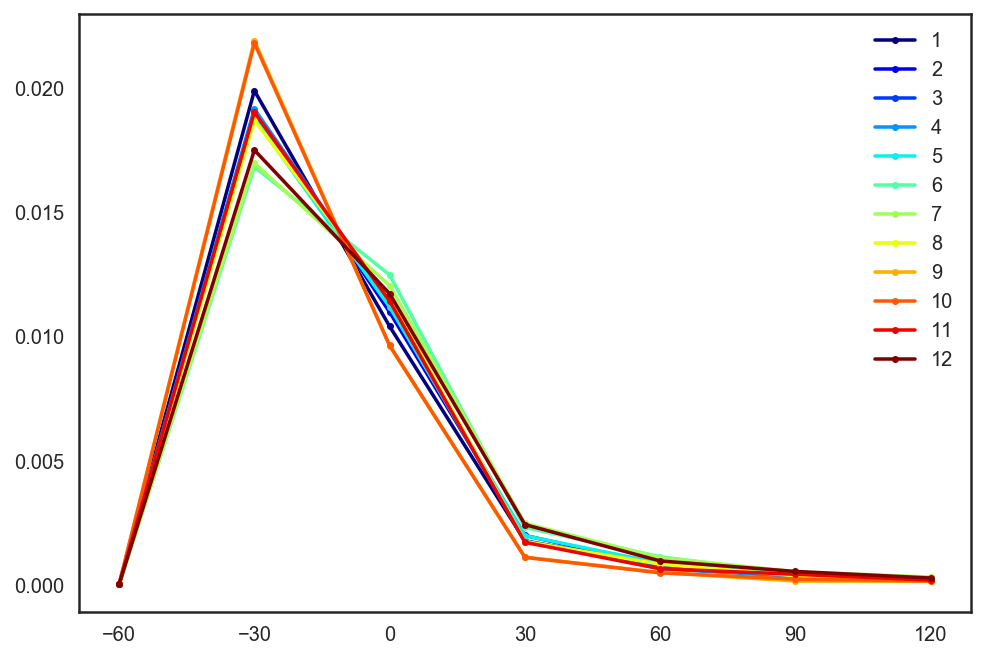

In [15]:
months_cmap = getcmaprgb(N_months, cm.jet)
for i in range(N_months):
    plt.plot(delay_bins[:-1],delay_by_month_hist[i],'.-',color=months_cmap[i],label=all_months[i])
plt.legend()
plt.xticks(delay_bins[:-1])

**1c. Make cdf for each month**

In [16]:
# Make cumulative distribution function for each month
from statsmodels.distributions.empirical_distribution import ECDF
delay_by_month_cdfy = np.zeros(N_months, dtype=np.ndarray)
for i in range(N_months):
    ecdf = ECDF(delay_by_month[i])
    delay_by_month_cdfy[i] = ecdf(delay_by_month[i])

(0.8, 1)

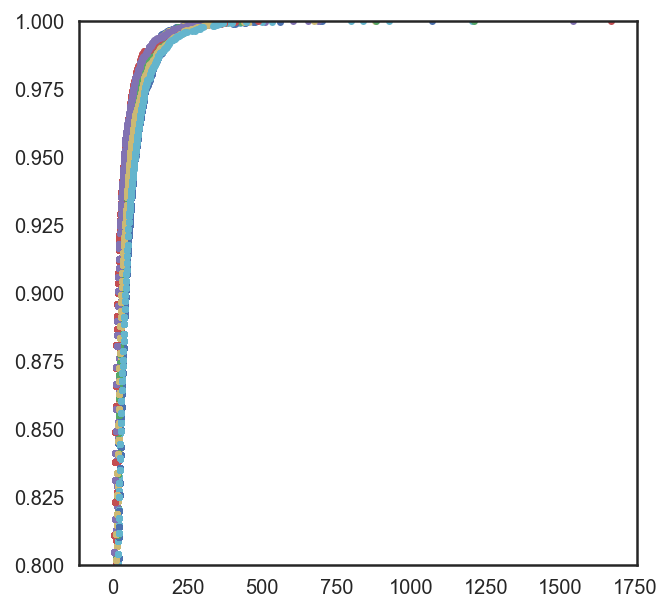

In [17]:
plt.figure(figsize=(5,5))
for i in range(N_months):
    plt.plot(delay_by_month[i],delay_by_month_cdfy[i],'.')
plt.ylim((.8,1))

**1d. Calculate quantiles for each month (e.g. what is the 90th percentile of delays?)**

In [18]:
all_quantiles = np.arange(10,100,10)
N_quantiles = len(all_quantiles)
delay_by_month_quantile = np.zeros((N_months,N_quantiles))
for i in range(N_months):
    delay_by_month_quantile[i] = np.percentile(delay_by_month[i],all_quantiles)

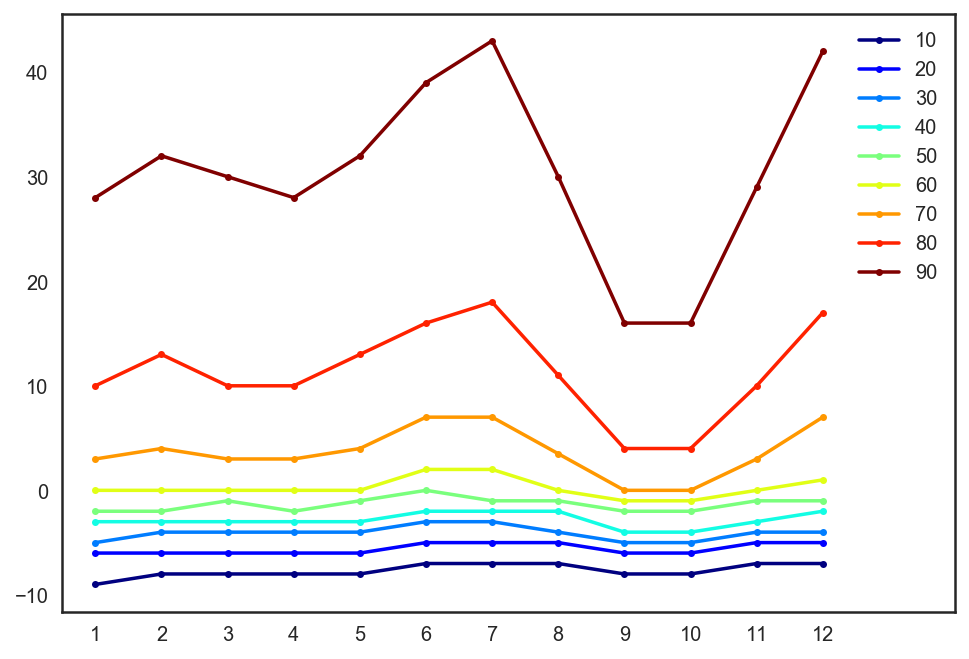

In [19]:
quantile_cmap = getcmaprgb(N_quantiles, cm.jet)
for i in range(N_quantiles):
    plt.plot(all_months,delay_by_month_quantile[:,i],'.-',color=quantile_cmap[i],label=all_quantiles[i])
plt.xticks(all_months)
plt.xlim((.5,14))
plt.legend()

**1e. Calculate fraction of flights with delays exceeding certain lengths each month**

In [21]:
all_mindelays = np.arange(0,130,10)
N_mindelays = len(all_mindelays)
delay_by_month_mind = np.zeros((N_months,N_mindelays))
for i in range(N_months):
    for j in range(N_mindelays):
        delay_by_month_mind[i,j] = np.mean(delay_by_month[i]>all_mindelays[j])

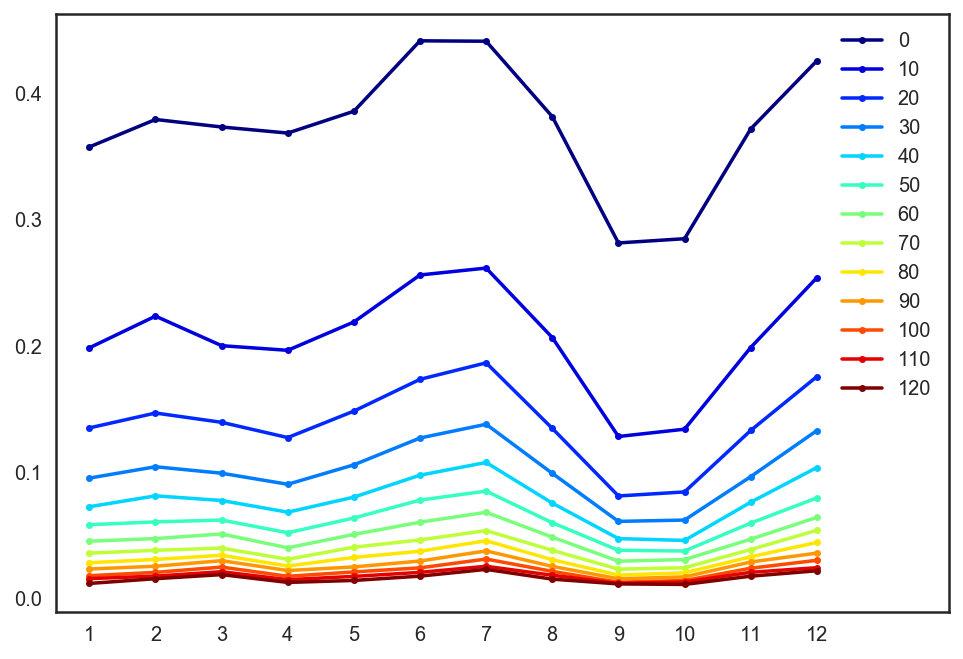

In [22]:
mindelays_cmap = getcmaprgb(N_mindelays, cm.jet)
for i in range(N_mindelays):
    plt.plot(all_months,delay_by_month_mind[:,i],'.-',color=mindelays_cmap[i],label=all_mindelays[i])
plt.xticks(all_months)
plt.xlim((.5,14))
plt.legend()

**1f. DataFrame Groupby**

In [23]:
df_SAN_by_month_mean = df_SAN.groupby('MONTH').mean()
df_SAN_by_month_mean

,YEAR,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
MONTH,,,,,,,,,,,,,,,,,,,,,
1,2015.0,15.697613,4.039622,1857.909483,1285.107759,1293.786638,6.676227,13.734041,1316.195158,144.368203,...,1532.413627,1531.345720,3.365116,0.001492,0.000497,12.895932,0.204352,13.727531,22.754021,1.078524
2,2015.0,14.586900,3.899702,1871.078526,1287.530517,1296.554708,7.796055,14.077410,1319.869185,144.427242,...,1530.804057,1530.118206,3.683877,0.001489,0.000186,13.296000,0.013000,10.864000,24.419000,1.553000
3,2015.0,16.158840,3.886433,1746.185236,1316.924800,1328.292511,8.028238,14.338502,1351.434756,148.364334,...,1521.701044,1511.566165,4.233810,0.001995,0.000307,11.071795,0.025641,16.814530,23.612821,0.856410
4,2015.0,15.529578,3.910717,1678.893614,1309.091950,1317.932999,6.782363,14.089468,1340.125883,150.236623,...,1531.125216,1529.467901,0.773042,0.002040,0.000314,10.164583,0.020833,14.638542,25.333333,0.933333
5,2015.0,15.996321,4.122643,1634.110072,1306.802238,1317.675763,8.040472,14.151050,1340.228033,152.474015,...,1533.787981,1521.426511,2.393198,0.003526,0.000307,11.497754,0.006289,12.559748,26.532794,1.156334
6,2015.0,15.554990,3.799641,1759.059404,1323.981595,1338.693850,10.648212,15.171057,1363.646962,157.169535,...,1506.738441,1494.850150,6.389565,0.004639,0.000150,10.178326,0.112483,14.333333,27.194102,1.101509
7,2015.0,16.149569,3.944397,1810.091523,1318.033477,1335.191092,11.985201,15.995545,1361.639460,158.612931,...,1496.436638,1487.201322,7.612374,0.001293,0.000144,11.331242,0.086575,13.429109,30.008783,1.553325
8,2015.0,15.878081,4.018926,1763.605781,1308.573797,1319.881602,7.939261,15.376926,1345.720534,156.782130,...,1508.243251,1494.881057,3.572102,0.003521,0.000440,11.242114,0.021313,15.867860,24.277067,0.625746
9,2015.0,15.484715,3.840325,1764.099024,1292.502114,1296.791220,3.872846,15.022931,1321.591153,151.174146,...,1526.489268,1516.697187,-1.370666,0.000976,0.000163,10.834848,0.043939,18.224242,26.462121,0.703030


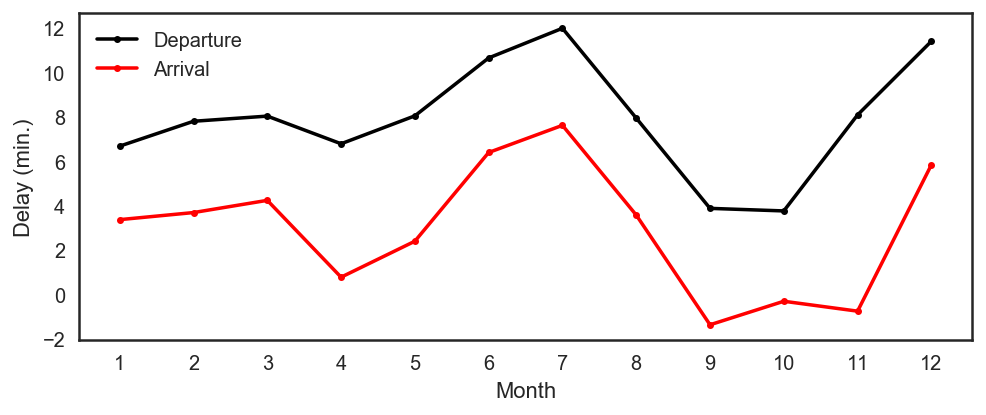

In [24]:
plt.figure(figsize=(8,3))
plt.plot(all_months,df_SAN_by_month_mean['DEPARTURE_DELAY'],'k.-',label='Departure')
plt.plot(all_months,df_SAN_by_month_mean['ARRIVAL_DELAY'],'r.-',label='Arrival')
plt.xticks(all_months)
plt.ylabel('Delay (min.)')
plt.xlabel('Month')
plt.legend()